### 1. Définition du problème

Dans ce projet le problème consiste à optimiser une campagne marketing 
d'une entreprise. la démarche utilisée est le publipostage. J'ai à ma disposition un jeux de données contenant 
l'ensemble des clients et les informations nécessaires pour l'étude. Je veux un programme 
capable de prédire si un client va répondre par oui ou non à la prochaine promotion. C'est ainsi un problème de classification binaire.

### 1.1 Pourquoi c’est utile de résoudre ce problème ?

La motivation pour résoudre ce problème est simple. Au lieu d'envoyer un courrier à tous les clients qui constituent un ensemble important de destinataire, il vaut mieux chercher à les cibler. C'est à dire extraire les client les plus susceptibles de répondre favorablement et les envoyer les lettres. Cela va engendrer un gain de temps et d'argents.

### 2. Importation des données, préparation, et visualisation

 2.1 Importation et préparation

In [19]:
## Importation des bibliothèques nécessaires.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
data = pd.read_excel("closing.xls", sep = ';')

In [21]:
data.head()

,id,R,F,M,ave,spends1,spends2,spends3,spends4,spendm1,...,stores,pmailed,prespond,resprate,flagresp,produni,flagret,flagcc,flagweb,response
0,55600066402,208,2,368.46,184.23,0.0,0.0,368.46,0.0,0.00,...,1,5,0,0.00,0,31.81,0,0,0,0
1,55600073501,6,4,258.00,64.50,0.0,0.0,258.00,0.0,55.99,...,1,4,2,50.00,1,32.72,1,1,0,1
2,55600076313,327,2,77.00,38.50,0.0,0.0,77.00,0.0,0.00,...,1,4,0,0.00,0,100.00,0,0,0,0
3,55600078045,66,8,846.06,105.75,0.0,0.0,846.06,0.0,0.00,...,1,9,6,66.67,1,23.27,0,1,0,0
4,55600078517,49,1,87.44,87.44,0.0,0.0,87.44,0.0,0.00,...,1,0,0,0.00,0,28.52,0,0,0,0


In [22]:
data = data.drop('id', axis = 1) ##   Suppression de l'identifiant qui n'est pas important dans 
                                ##    l'étude que l'on va faire

In [23]:
### La méthode info() permet d'obtenir une description des données, en particulier le
### nombre total de lignes, le type de chaque variable et
### le nombre de valeurs non nulles.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 32 columns):
R            21740 non-null int64
F            21740 non-null int64
M            21740 non-null float64
ave          21740 non-null float64
spends1      21740 non-null float64
spends2      21740 non-null float64
spends3      21740 non-null float64
spends4      21740 non-null float64
spendm1      21740 non-null float64
spendm23     21740 non-null float64
spendm456    21740 non-null float64
flagm1       21740 non-null int64
flagm23      21740 non-null int64
flagm456     21740 non-null int64
spendm12     21740 non-null float64
flagm12      21740 non-null int64
promos       21740 non-null int64
daysfile     21740 non-null int64
dayspurch    21740 non-null float64
classes      21740 non-null int64
coupons      21740 non-null int64
items        21740 non-null int64
stores       21740 non-null int64
pmailed      21740 non-null int64
prespond     21740 non-null int64
resprate     21740 

Les données sont toutes au format numérique parce que les variables qualitatives ont dèjà été transformées. 
Maintenant il nous faut distinguer ces différentes types de variables.

In [24]:
var_cat = [ cat for cat in data.columns if cat == 'flagm1' or cat == 'flagm23' \
          or cat == 'flagm456' or cat == 'flagm12' or cat == 'flagresp'\
          or cat == 'flagret' or cat == 'flagcc' or cat == 'flagweb'] # Variables numériques
var_num = [ var for var in data.columns if var not in var_cat ] # Variables catégoriques

In [25]:
data.describe()
## cette méthode présente un récapitulatif des variables. 

,R,F,M,ave,spends1,spends2,spends3,spends4,spendm1,spendm23,...,stores,pmailed,prespond,resprate,flagresp,produni,flagret,flagcc,flagweb,response
count,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,...,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000
mean,126.966329,5.064213,472.888236,113.889105,14.217662,147.822047,286.851738,24.257214,31.990516,58.237264,...,2.340064,4.672723,1.193606,17.276674,0.461362,37.888989,0.337902,0.383763,0.041536,0.166099
std,104.737712,6.420276,640.050799,87.249794,149.863657,395.139174,441.460820,113.855957,97.163860,131.218192,...,1.603060,3.547191,1.828949,24.543108,0.498516,28.149856,0.473006,0.486312,0.199532,0.372178
min,1.000000,1.000000,0.990000,0.490000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,135.605000,60.990000,0.000000,0.000000,78.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,18.410000,0.000000,0.000000,0.000000,0.000000
50%,98.000000,3.000000,263.490000,92.070000,0.000000,0.000000,147.600000,0.000000,0.000000,0.000000,...,2.000000,4.000000,0.000000,0.000000,0.000000,29.520000,0.000000,0.000000,0.000000,0.000000
75%,206.000000,6.000000,569.000000,139.505000,0.000000,127.937500,321.942500,0.000000,0.000000,67.097500,...,3.000000,8.000000,2.000000,30.000000,1.000000,50.000000,1.000000,1.000000,0.000000,0.000000
max,365.000000,115.000000,22511.490000,1919.880000,10642.720000,11476.800000,22511.490000,4099.920000,2189.000000,3373.460000,...,19.000000,11.000000,11.000000,100.000000,1.000000,200.000000,1.000000,1.000000,1.000000,1.000000


les lignes count, min et max fournissent repectivement le nombre de valeur, la moyenne, le minimum et le maximum. la ligne std représente l'écart type.
les lignes 25%, 50% et 75% présentent les centiles correspondants. Un centile indique
la valeur en dessous de laquelle se situe un pourcentage donné des observations du groupe.

In [26]:
for i in data.columns:
    if i in var_cat:
        print (data[i].value_counts(normalize = True),'\n')

#Regardons la répartition des variables catégorielles.

0    0.789696
1    0.210304
Name: flagm1, dtype: float64 

0    0.623091
1    0.376909
Name: flagm23, dtype: float64 

1    0.541352
0    0.458648
Name: flagm456, dtype: float64 

0    0.759936
1    0.240064
Name: flagm12, dtype: float64 

0    0.538638
1    0.461362
Name: flagresp, dtype: float64 

0    0.662098
1    0.337902
Name: flagret, dtype: float64 

0    0.616237
1    0.383763
Name: flagcc, dtype: float64 

0    0.958464
1    0.041536
Name: flagweb, dtype: float64 



Les variables catégoriques sont réparties de manière très déséquilibrée.

In [27]:
print(data['response'].value_counts(normalize = True)) ### response est la variable à étudier 

0    0.833901
1    0.166099
Name: response, dtype: float64


c'est un jeu de données très déséquilibré..

In [28]:
### IL n'y a aucune valeur manquante dans notre dataset.
def Missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print (missing_data[(percent>0)],'\n')
    
Missing_values(data)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



### 2.2 Visualisation

 Je vais afficher quelques graphiques qui apportent de l'information sur ce qui influence la variable cible response.

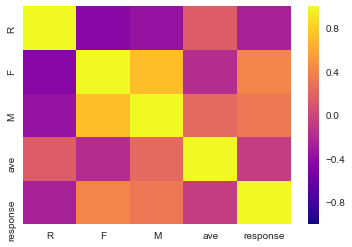

In [29]:

sns.heatmap(data[['R', 'F', 'M', 'ave', 'response']].corr(),cmap='plasma') # plusieurs variables semblent influencer response.


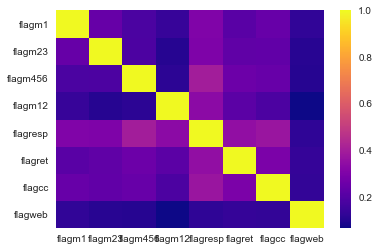

In [30]:
sns.heatmap(data[var_cat].corr(),cmap='plasma') #Quelques variables semblent influencer response.

La corrélation se lit d'en bas vers le haut par correlation croissante

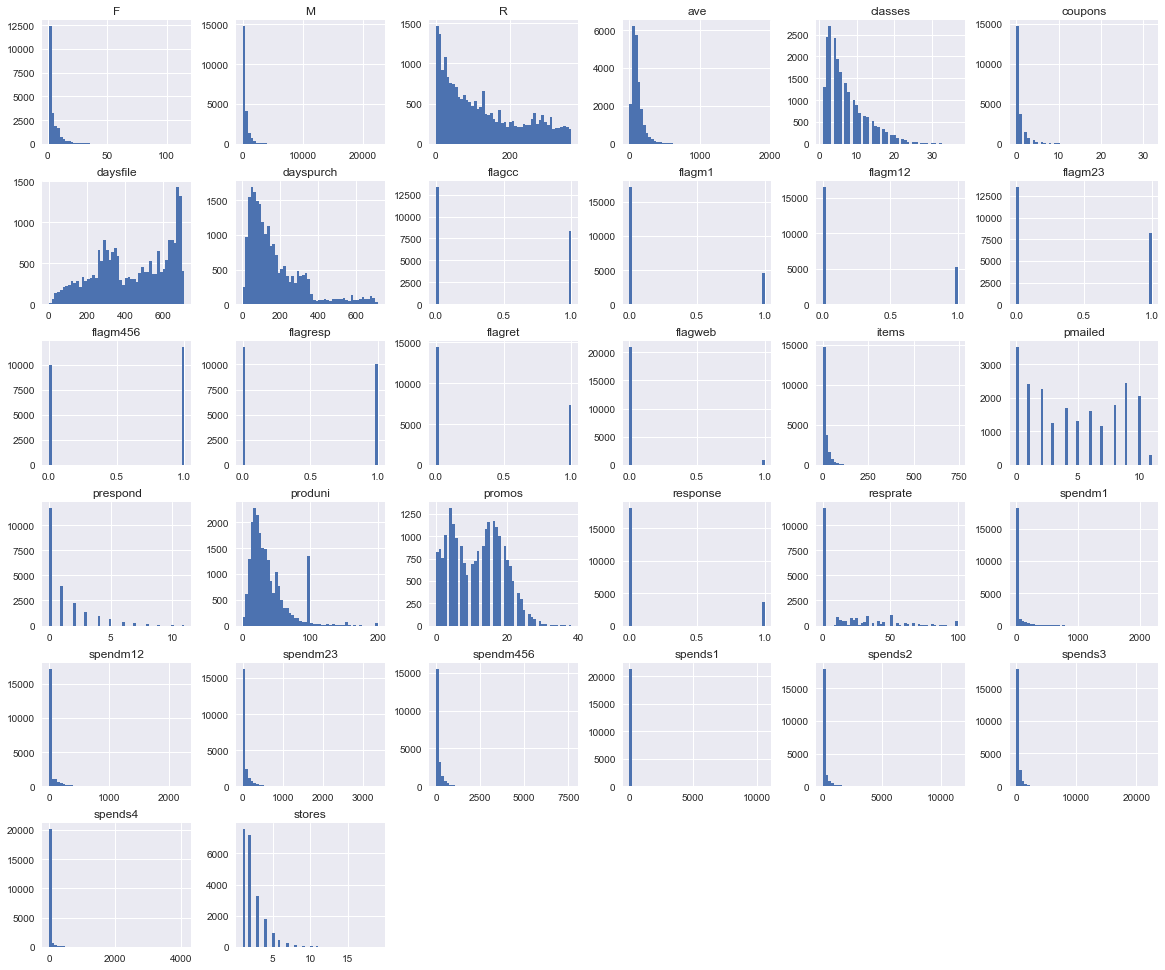

In [31]:
data.hist(figsize=(20, 20), bins=50, layout=(7, 6));

Les features catégorielles se remarquent bien, et que les distributions des données sont fortement assymétriques. 

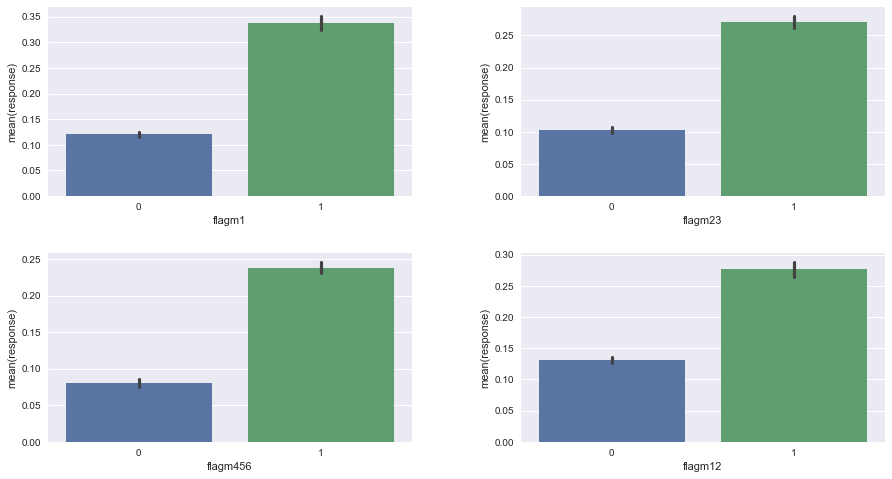

In [32]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
fig.subplots_adjust(hspace=.3,wspace=.3)
sns.barplot(x='flagm1',y='response',data=data,ax=axs[0][0])
sns.barplot(x='flagm23',y='response',data=data,ax=axs[0][1])
sns.barplot(x='flagm456',y='response',data=data,ax=axs[1][0])
sns.barplot(x='flagm12',y='response',data=data,ax=axs[1][1])

### On note une variation de l'influence des données catégoriques.

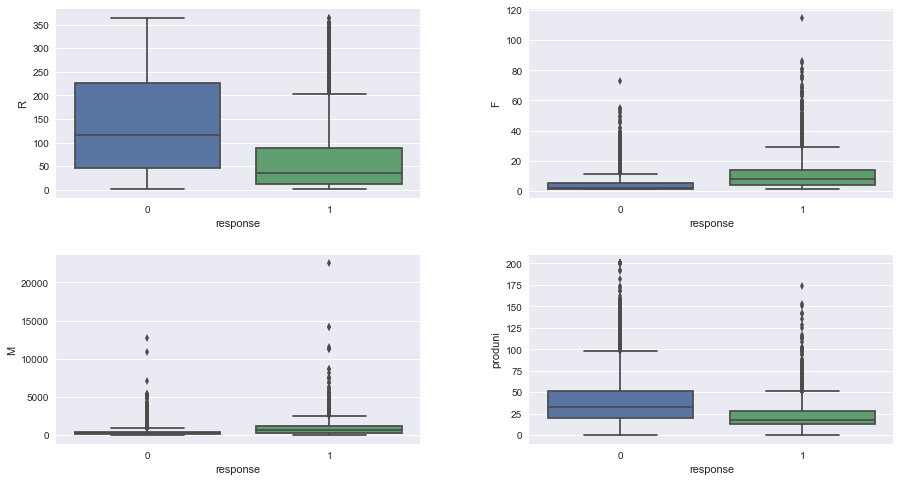

In [33]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
fig.subplots_adjust(hspace=.3,wspace=.3)
sns.boxplot(y='R',x='response',data=data,ax=axs[0][0])
sns.boxplot(y='F',x='response',data=data,ax=axs[0][1])
sns.boxplot(y='M',x='response',data=data,ax=axs[1][0])
sns.boxplot(y='produni',x='response',data=data,ax=axs[1][1])


### 3. Selection de modèle

In [34]:
Y = data['response'] #### Isolation de la variable cible.
data.drop(['response'], axis = 1, inplace = True)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.33)

Pour le moment on ne sait pas les classifieurs qui pourraient être efficaces.
Je vais Construire une fonction d'évaluation qui prend en entrée un dictionnaire de classifieurs,
et renvoie la moyenne et l'écart-type de leurs performances sur une cross validation à trois ensemble pour l'erreur auc.

In [35]:
def Evaluation(clfs):
    for clf in clfs:
        clfs[clf]['score'] = cross_val_score(clfs[clf]['clf'], data, Y, cv=3,scoring='roc_auc')
        print(clfs[clf]['name'] + ": %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(), clfs[clf]['score'].std()*2))

In [36]:
# Je vais importer les classifieurs qui me semblent intéressants.

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [37]:
clfs = {}
clfs['gbc'] = {'clf': GradientBoostingClassifier(), 'name': 'GradientBoostingClassifier'}
clfs['rf'] = {'clf': RandomForestClassifier( n_jobs=-1), 'name':'RandomForest'}
clfs['tree'] = {'clf': DecisionTreeClassifier(), 'name':'DecisionTreeClassifier'}
clfs['svc'] = {'clf': SVC(), 'name': 'SupportVectorClassifier'}
clfs['knn'] = {'clf': KNeighborsClassifier(), 'name': 'KNeighborsClassifier'}


Evaluation(clfs)

GradientBoostingClassifier: 0.7991 (+/- 0.0058)
RandomForest: 0.7370 (+/- 0.0076)
DecisionTreeClassifier: 0.5996 (+/- 0.0077)
SupportVectorClassifier: 0.5968 (+/- 0.0103)
KNeighborsClassifier: 0.6894 (+/- 0.0117)


Le meilleur modèle est le GradientBoostingClassifier. Je vais alors le selectionner.

In [38]:

model = GradientBoostingClassifier().fit(X_train,Y_train)
pred = model.predict_proba(X_test)[:,1]
print ('Performance du modèle :', roc_auc_score(Y_test,pred))


Performance du modèle : 0.798172527804


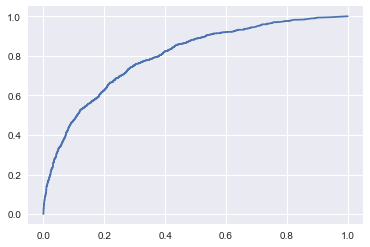

In [39]:
fpr, tpr, _ = roc_curve(Y_test, pred)
plt.plot(fpr,tpr);

##### Optimisation du modèle

In [41]:
#### On va faire varier les principaux paramètres du modèle, et observer les performances.

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3).fit(X_train,Y_train)
pred = model.predict_proba(X_test)[:,1]
print('Performance du modèle :', roc_auc_score(Y_test,pred))
#En faisant à peine bouger les paramètres, on voit une amélioriation des performances.

Performance du modèle : 0.798168625242


In [42]:
### Cette fonction me permet de trouver des paramètres optimaux pour le gradient boosting.
from sklearn.grid_search import GridSearchCV

#Attention, cela peut être long !
model = GradientBoostingClassifier()

params = {
    'n_estimators' : [100,250,500],
    'max_depth' : [2,3,5],
    'learning_rate':[0.01,0.05,0.1]}

grid = GridSearchCV(model,param_grid=params,cv=3,scoring = 'roc_auc',n_jobs=-1,verbose = 1)
grid.fit(X_train,Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 250, 500], 'max_depth': [2, 3, 5], 'learning_rate': [0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [43]:
print('Résultat de la grid search :', grid.best_score_, grid.best_params_)

##On peut récupérer le meilleur modèle : 
best = grid.best_estimator_

print('Performance du modèle optimisé :', roc_auc_score(Y_test,best.predict_proba(X_test)[:,1]))


Résultat de la grid search : 0.799374542626663 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
Performance du modèle optimisé : 0.798547243439


#### 4. Analyse en Composante principale

On va essayer de réduire la dimension de notre jeu de données pour espérer améliorer le performance de notre modèle.

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_transpose = data.T
pca.fit(x_transpose)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

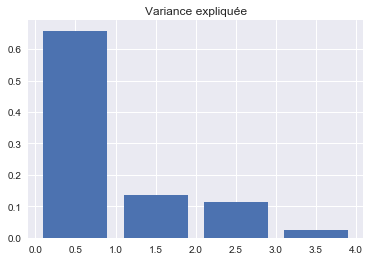

In [45]:
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

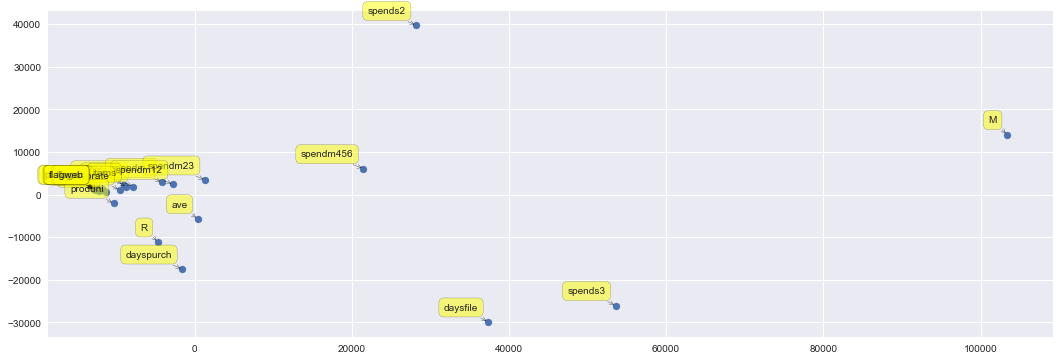

In [46]:
import warnings
warnings.filterwarnings('ignore')
X_reduced = pca.transform(x_transpose)
plt.figure(figsize=(18,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
for label, x, y in zip(x_transpose.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

##### Les variables les plus dissemblables sont celles qui contribuent le plus. Toutefois, à la vue de ce graphique, il apparaît qu’il faut normaliser les données avant d’interpréter l’ACP :

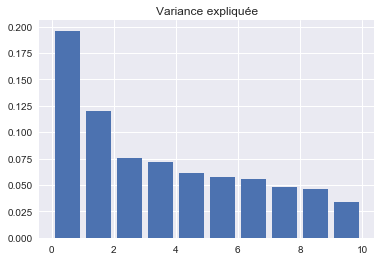

In [47]:
from sklearn.preprocessing import normalize
xnorm = normalize(x_transpose)
pca = PCA(n_components=10)
pca.fit(xnorm)
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

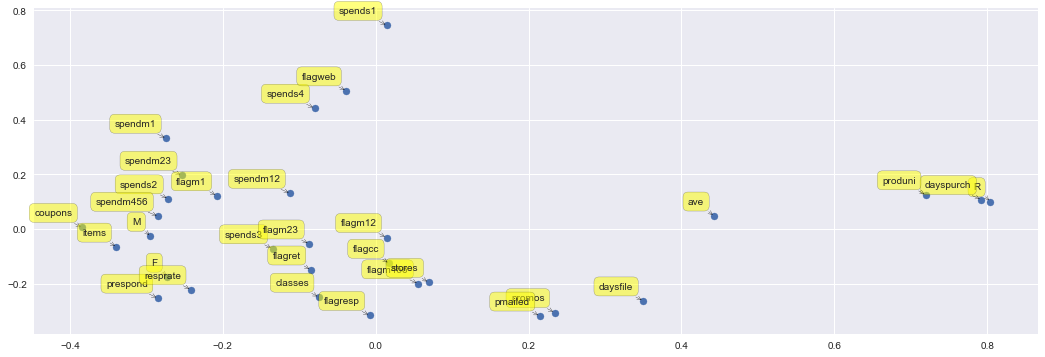

In [48]:
X_reduced = pca.transform(xnorm)
plt.figure(figsize=(18,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
for label, x, y in zip(x_transpose.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


In [49]:

model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,max_depth=3).fit(X_train,Y_train)
pred = model.predict_proba(X_test)[:,1]
print('Performance du modèle :', roc_auc_score(Y_test,pred))


Performance du modèle : 0.793343943656
